In [1]:
import os

os.chdir('..')

In [2]:
from src.utils import YamlReader
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

config_path = 'configs/dfs/FcVAE_config.yaml'

# Read configuration file
yr = YamlReader(config_path)
oc = yr.read()

model = yr.build_VAE(oc)
model = model.to(device)

In [4]:
model.load_state_dict(torch.load('saved_models/dfs/FcVAE.pt'))

<All keys matched successfully>

In [5]:
def plot_maze(maze, name='maze'):
    # plot 1s as black squares
    # and 0s as white squares
    # use inverse cmap to make 0s white
    plt.imshow(maze, cmap='gray_r')
    plt.title('Maze (black squares are walls)')
    plt.show()



In [6]:
sample_mazes = model.sample(batch_size=64)

sample_mazes = sample_mazes.view(-1, 65, 65).cpu().detach().numpy()

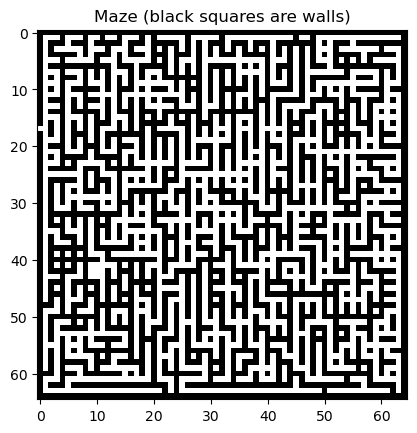

In [12]:
sample_maze_1 = sample_mazes[19]
plot_maze(sample_maze_1)